In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import random
import os
import numpy as np
import matplotlib.pyplot as plt


In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


In [38]:
X_train, X_test = X_train.reshape(-1, 28,28,1), X_test.reshape(-1, 28,28,1)

In [39]:

model_1 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [47]:
model_1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [48]:
h1 = model_1.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 16s 9ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0392 - val_accuracy: 0.9891
Epoch 2/5
1715/1715 [==============================] - 16s 9ms/step - loss: 0.0187 - accuracy: 0.9937 - val_loss: 0.0455 - val_accuracy: 0.9893
Epoch 3/5
1715/1715 [==============================] - 16s 9ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0429 - val_accuracy: 0.9880
Epoch 4/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0560 - val_accuracy: 0.9855
Epoch 5/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0545 - val_accuracy: 0.9870


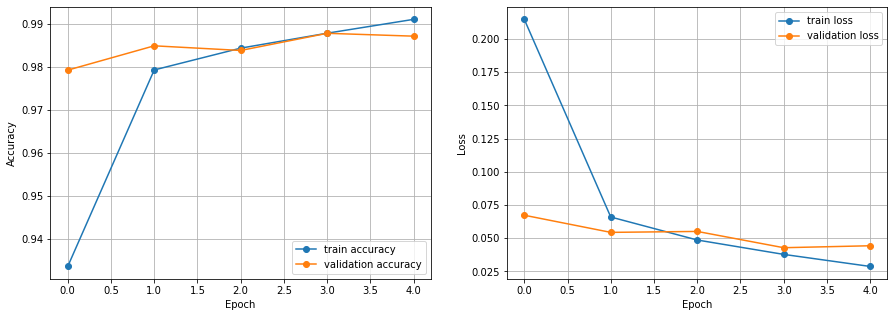

In [42]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()



In [45]:
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0317 - accuracy: 0.9909

Test Loss: 0.03169799596071243

Test Accuracy: 0.9908999800682068


In [49]:
model_2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

In [50]:

model_2.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [51]:
h2 = model_2.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.8355 - accuracy: 0.7390 - val_loss: 0.2955 - val_accuracy: 0.9094
Epoch 2/5
1715/1715 [==============================] - 16s 10ms/step - loss: 0.1735 - accuracy: 0.9470 - val_loss: 0.1303 - val_accuracy: 0.9611
Epoch 3/5
1715/1715 [==============================] - 16s 10ms/step - loss: 0.1246 - accuracy: 0.9617 - val_loss: 0.1023 - val_accuracy: 0.9696
Epoch 4/5
1715/1715 [==============================] - 16s 10ms/step - loss: 0.1008 - accuracy: 0.9689 - val_loss: 0.1036 - val_accuracy: 0.9685
Epoch 5/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0854 - accuracy: 0.9733 - val_loss: 0.0784 - val_accuracy: 0.9755


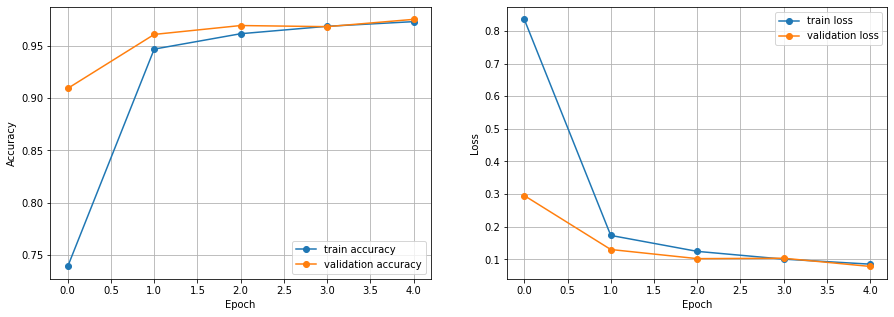

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()



In [53]:
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.9778

Test Loss: 0.07097314298152924

Test Accuracy: 0.9778000116348267


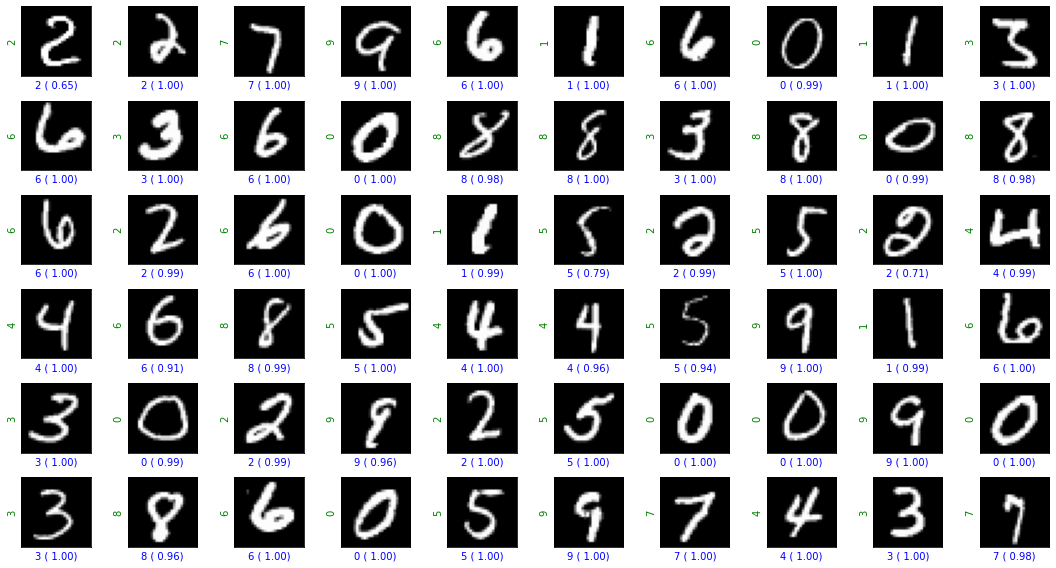

In [55]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_2.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [56]:
model_3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)               

In [57]:

model_3.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [58]:
h3 = model_3.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.2151 - accuracy: 0.9329 - val_loss: 0.0641 - val_accuracy: 0.9824
Epoch 2/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0635 - accuracy: 0.9807 - val_loss: 0.0669 - val_accuracy: 0.9812
Epoch 3/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0556 - val_accuracy: 0.9847
Epoch 4/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0458 - val_accuracy: 0.9893
Epoch 5/5
1715/1715 [==============================] - 17s 10ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0556 - val_accuracy: 0.9858


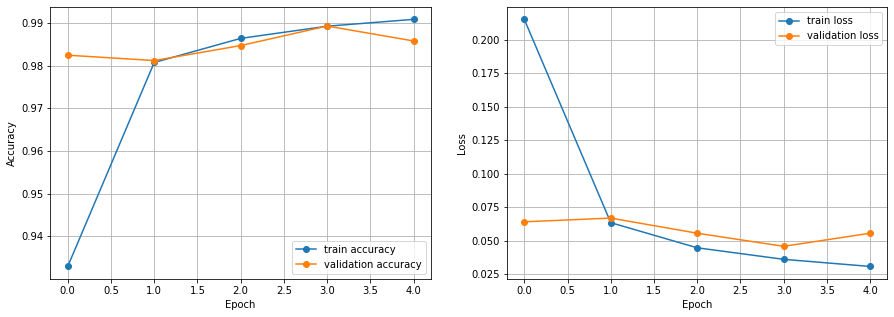

In [59]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()



In [60]:

test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9853

Test Loss: 0.04896722733974457

Test Accuracy: 0.9853000044822693


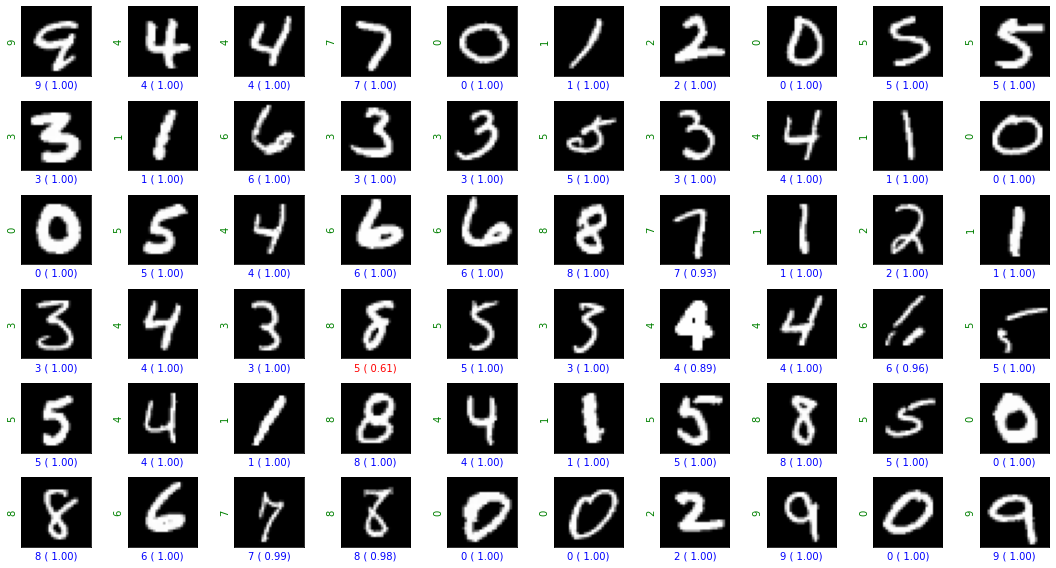

In [61]:

ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_3.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()